In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Data tidying and exploration

In [2]:
car_data = pd.read_csv('auto-mpg.csv')

In [3]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
print('Dataset shape:{}'.format(car_data.shape))

Dataset shape:(398, 9)


In [5]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

#### There is a '?' in the horsepower data which causes the column type to change.

In [6]:
car_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
car_data = car_data[car_data.horsepower != '?']

In [8]:
car_data.shape

(392, 9)

In [9]:
car_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
car_data['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

#### Change the model year column to display the full years.

In [11]:
car_data['model year']+=1900

In [12]:
car_data['model year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982], dtype=int64)

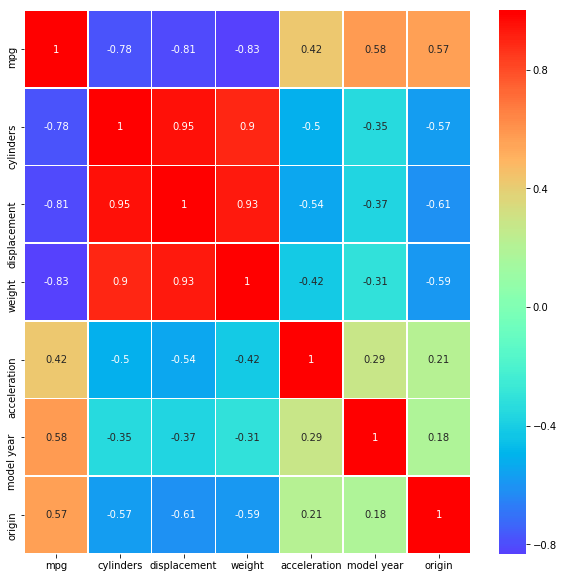

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

In [14]:
car_data = car_data.drop(columns=['car name'])

In [15]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,1970,1
1,15.0,8,350.0,165,3693,11.5,1970,1
2,18.0,8,318.0,150,3436,11.0,1970,1
3,16.0,8,304.0,150,3433,12.0,1970,1
4,17.0,8,302.0,140,3449,10.5,1970,1


### Train-test split

#### Mpg is the predicted column and all of the rest are used in training 

In [16]:
car_data_y = car_data.iloc[:,0].values
car_data_x = car_data.iloc[:,1:].values

In [17]:
car_data_y.shape

(392,)

In [18]:
car_data_x.shape

(392, 7)

In [19]:
car_data_x_train, car_data_x_test, car_data_y_train, car_data_y_test = train_test_split(car_data_x, car_data_y, 
                                                                                       train_size=0.7,
                                                                                       test_size=0.3,
                                                                                       random_state=22)

In [20]:
print(car_data_x_train.shape, car_data_x_test.shape, car_data_y_train.shape, car_data_y_test.shape)

(274, 7) (118, 7) (274,) (118,)


In [21]:
scores = {}

#### Linear regression with one feature

In [22]:
linear_regression = LinearRegression()
linear_regression.fit(car_data_x_train[:,3].reshape(-1,1), car_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
car_data_y_pred = linear_regression.predict(car_data_x_test[:,3].reshape(-1,1))

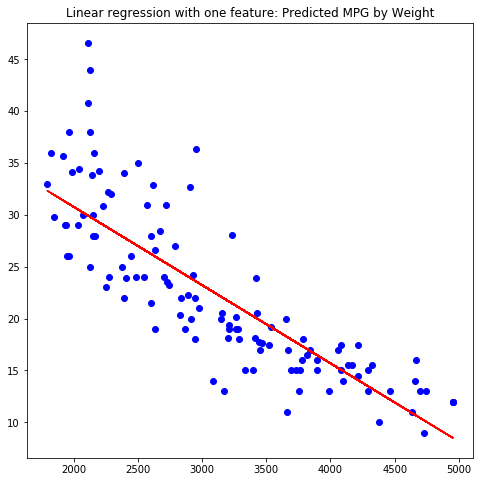

In [24]:
plt.figure(figsize=(8,8))
plt.title('Linear regression with one feature: Predicted MPG by Weight')
plt.scatter(car_data_x_test[:,3], car_data_y_test, color='blue')
plt.plot(car_data_x_test[:,3], car_data_y_pred, color='red')

In [25]:
result = linear_regression.score(car_data_x_test[:,3].reshape(-1,1), car_data_y_test)
print('Linear Regression R^2: {:.3f}'.format(linear_regression.score(car_data_x_test[:,3].reshape(-1,1),
                                                                     car_data_y_test)))

Linear Regression R^2: 0.697


In [26]:
scores['linear_one_feature'] = result

#### Polynomial regression - one feature second degree

In [27]:
poly = PolynomialFeatures(degree=2)

In [28]:
feature_test = car_data_x_test[:,3].reshape(-1,1)
feature_train = car_data_x_train[:,3].reshape(-1,1)

In [29]:
poly_x_train = poly.fit_transform(feature_train)
poly_x_test = poly.fit_transform(feature_test)

In [30]:
linear_regression = LinearRegression()
linear_regression.fit(poly_x_train, car_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [32]:
poly_x_test.shape

(118, 3)

In [33]:
poly_pred = linear_regression.predict(poly_x_test)

In [34]:
plot_x_test, plot_y_test = zip(*sorted(zip(feature_test, poly_pred)))

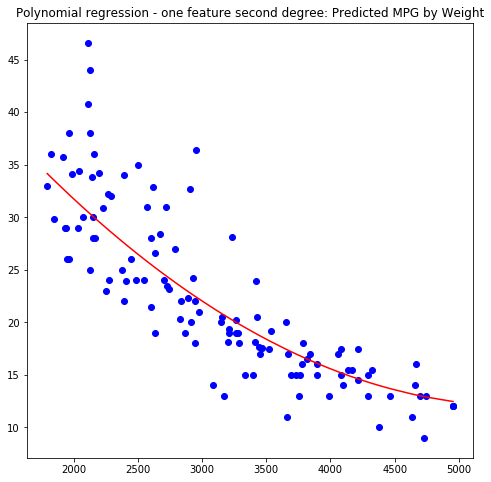

In [35]:
plt.figure(figsize=(8,8))
plt.title('Polynomial regression - one feature second degree: Predicted MPG by Weight')
plt.scatter(feature_test, car_data_y_test, color='blue')
plt.plot(plot_x_test, plot_y_test, color='red')

In [36]:
result = linear_regression.score(poly_x_test, car_data_y_test)
print('Polynomial Regression R^2: {:.3f}'.format(linear_regression.score(poly_x_test, car_data_y_test)))

Polynomial Regression R^2: 0.723


In [37]:
scores['poly_one_feature^2'] = result

#### Polynomial regression - one feature ninth degree

In [38]:
poly = PolynomialFeatures(degree=9)
feature_test = car_data_x_test[:,3].reshape(-1,1)
feature_train = car_data_x_train[:,3].reshape(-1,1)
poly_x_train = poly.fit_transform(feature_train)
poly_x_test = poly.fit_transform(feature_test)
linear_regression = LinearRegression()
linear_regression.fit(poly_x_train, car_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9']

In [40]:
poly_pred = linear_regression.predict(poly_x_test)
plot_x_test, plot_y_test = zip(*sorted(zip(feature_test, poly_pred)))

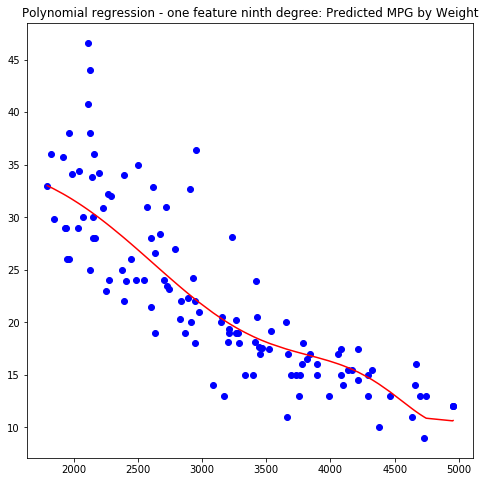

In [41]:
plt.figure(figsize=(8,8))
plt.title('Polynomial regression - one feature ninth degree: Predicted MPG by Weight')
plt.scatter(feature_test, car_data_y_test, color='blue')
plt.plot(plot_x_test, plot_y_test, color='red')

In [42]:
result = linear_regression.score(poly_x_test, car_data_y_test)
print('Polynomial Regression R^2: {:.3f}'.format(linear_regression.score(poly_x_test, car_data_y_test)))

Polynomial Regression R^2: 0.726


In [43]:
scores['poly_one_feature^9'] = result

#### Linear regression with all features

In [44]:
linear_regression = LinearRegression()

In [45]:
linear_regression.fit(car_data_x_train, car_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
car_data_y_pred = linear_regression.predict(car_data_x_test)

In [47]:
print(car_data_y_pred)

[25.12383227 24.51202413 18.00441813 20.65728439 27.02503751 10.95491111
 21.62553167 21.00276902 21.52955615 27.0794616  28.31685369 26.26969513
 20.00783409 28.913797   28.64714474  9.02264305 28.89230066 19.89424312
 16.4025372  16.75886742 23.46867478 21.30129752 23.58002205 15.66213016
 28.9386943  32.31448714 21.83567146 13.68575758 21.101457   25.04464736
 31.83869033 20.52388083 14.41552286 10.56862671 25.79592923 24.070237
 25.79507549 24.2325738  21.69599133 35.02178271 27.12195835  8.06086649
 16.58102403 31.19892624 28.291057   30.89735193 22.25868409 15.5060397
 29.52711432  9.81077571 26.29650318 33.9227512  12.97480629 18.36584119
 10.93594815 33.42635785 14.85425811 22.12346098 35.85884127 20.14039658
 25.97672398 27.39990084 16.49340325  9.4108842  15.9279676  15.29756101
 32.05724946 33.35038119 22.27036285 28.79359667 18.54528861 21.61935329
 16.51268322 26.14177297 17.99983718 19.20500588 34.38433308 11.62005532
 17.43998184 25.73321883 23.67332383 22.84505896 15.23

In [48]:
result = linear_regression.score(car_data_x_test, car_data_y_test)
print('Linear Regression R^2: {:.3f}'.format(linear_regression.score(car_data_x_test, car_data_y_test)))

Linear Regression R^2: 0.810


In [49]:
scores['linear_all'] = result

#### Polynomial regression - all features second degree

In [50]:
poly_features = PolynomialFeatures(degree=2)
car_data_xpoly_train = poly_features.fit_transform(car_data_x_train)
car_data_xpoly_test = poly_features.fit_transform(car_data_x_test)
linear_regression.fit(car_data_xpoly_train, car_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
car_data_y_pred = linear_regression.predict(car_data_xpoly_test)
print(car_data_y_pred)

[23.98027856 25.32789003 15.78347614 18.63580551 25.90826331 13.38024687
 18.83448894 19.39901325 20.35214096 26.07926599 30.40301132 23.92603271
 17.11791808 28.86165681 29.87883891 12.92918514 27.05606388 18.28650188
 15.32748171 16.71523917 20.28973936 19.14428497 22.15712129 15.0558551
 30.41735402 36.7584322  14.9769212  14.74389066 20.16155843 23.51039671
 34.51450889 19.03987591 14.79658059 13.25089713 28.3879092  26.52503832
 27.43174815 23.91738546 18.77946514 35.8043403  20.48405424 11.42928171
 15.65657562 33.25373095 27.64272313 31.94014586 19.72597265 16.63309876
 29.55719575 13.14901463 23.26469281 37.18586241 12.95944165 17.72740286
 13.30031865 35.06483374 14.93142871 22.25670457 37.02480176 20.20277954
 24.89649618 20.97387826 15.67608014 13.61153866 13.1861237  15.73389908
 35.04484617 34.29947796 20.30154729 31.12693363 16.944074   20.90788354
 14.48709869 29.30490803 15.73983706 19.28511483 42.47653027 13.91060084
 16.37523162 23.07312225 24.69731324 26.43648708 14.

In [52]:
result = linear_regression.score(car_data_xpoly_test, car_data_y_test)
print('Polynomial Regression R^2: {:.3f}'.format(linear_regression.score(car_data_xpoly_test, car_data_y_test)))

Polynomial Regression R^2: 0.873


In [53]:
scores['poly_all^2'] = result

#### Polynomial regression - all features third degree

In [54]:
poly_features = PolynomialFeatures(degree=3)
car_data_xpoly_train = poly_features.fit_transform(car_data_x_train)
car_data_xpoly_test = poly_features.fit_transform(car_data_x_test)
linear_regression.fit(car_data_xpoly_train, car_data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
car_data_y_pred = linear_regression.predict(car_data_xpoly_test)
print(car_data_y_pred)

[ 25.68217073  26.26044716  19.41100934  18.94378457  26.16204722
  11.92554986  20.75302287  17.97060837  19.01226805  31.23915242
  30.45481839  24.77713122  17.72107991  27.3919631   30.67608142
  10.98405981  25.90764298  18.88825011  18.6344067   20.93558341
  15.07243588  18.29979791  18.86894663  16.33721705  29.27572698
  34.54463665  36.88658438  12.51636612  18.50018646  66.58973024
  41.3770814   18.69260597  17.56974775  15.48108164  22.97376421
  25.21075771  30.30453564  23.31573365  22.5490882   37.54615442
  44.64122794   1.14115589  21.6408882   32.73084327  25.40110017
  32.0380086   18.07082783  16.1167216   26.59749575  16.48925737
  25.08564805  39.27125564   7.54767582  19.81699534  14.30944195
  36.39022511  17.41705493  21.4618388   40.16285231  15.64438213
  28.34716112  92.81687476  21.61724464  16.53847463  10.78883495
  13.44667899  34.79255033  36.26149776  22.94067778  31.4247346
  15.12113972  19.86813038  14.74781628  70.81716097  16.7627774
  20.2182943

In [56]:
result = linear_regression.score(car_data_xpoly_test, car_data_y_test)
print('Polynomial Regression R^2: {:.3f}'.format(linear_regression.score(car_data_xpoly_test, car_data_y_test)))

Polynomial Regression R^2: -0.785


In [57]:
scores['poly_all^3'] = result

In [58]:
print('Regression results:')
print(sorted(scores.items(), key=lambda kv: kv[1], reverse=True))

Regression results:
[('poly_all^2', 0.8728088462912125), ('linear_all', 0.8101423494593327), ('poly_one_feature^9', 0.725885735578365), ('poly_one_feature^2', 0.723201149320406), ('linear_one_feature', 0.697065080303364), ('poly_all^3', -0.7850113774043002)]
